In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [47]:
train_data = pd.read_csv('train.csv')

Data understanding

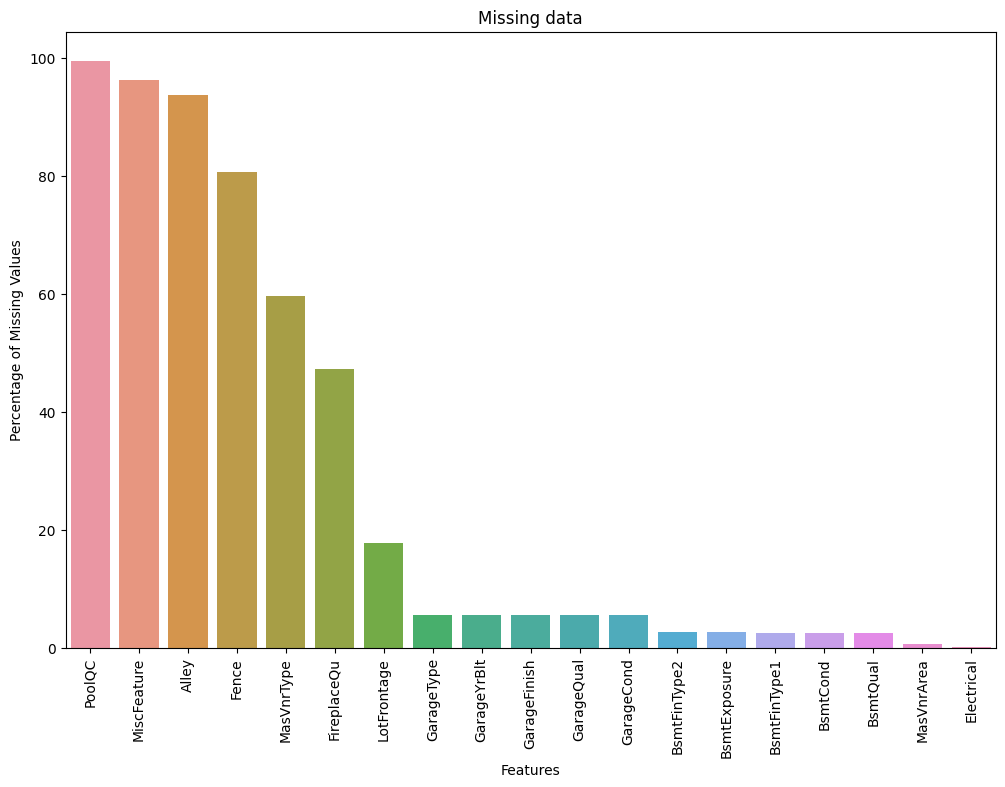

In [48]:
missing_percentage = train_data.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Percentage of Missing Values")
plt.title("Missing data")
plt.show()

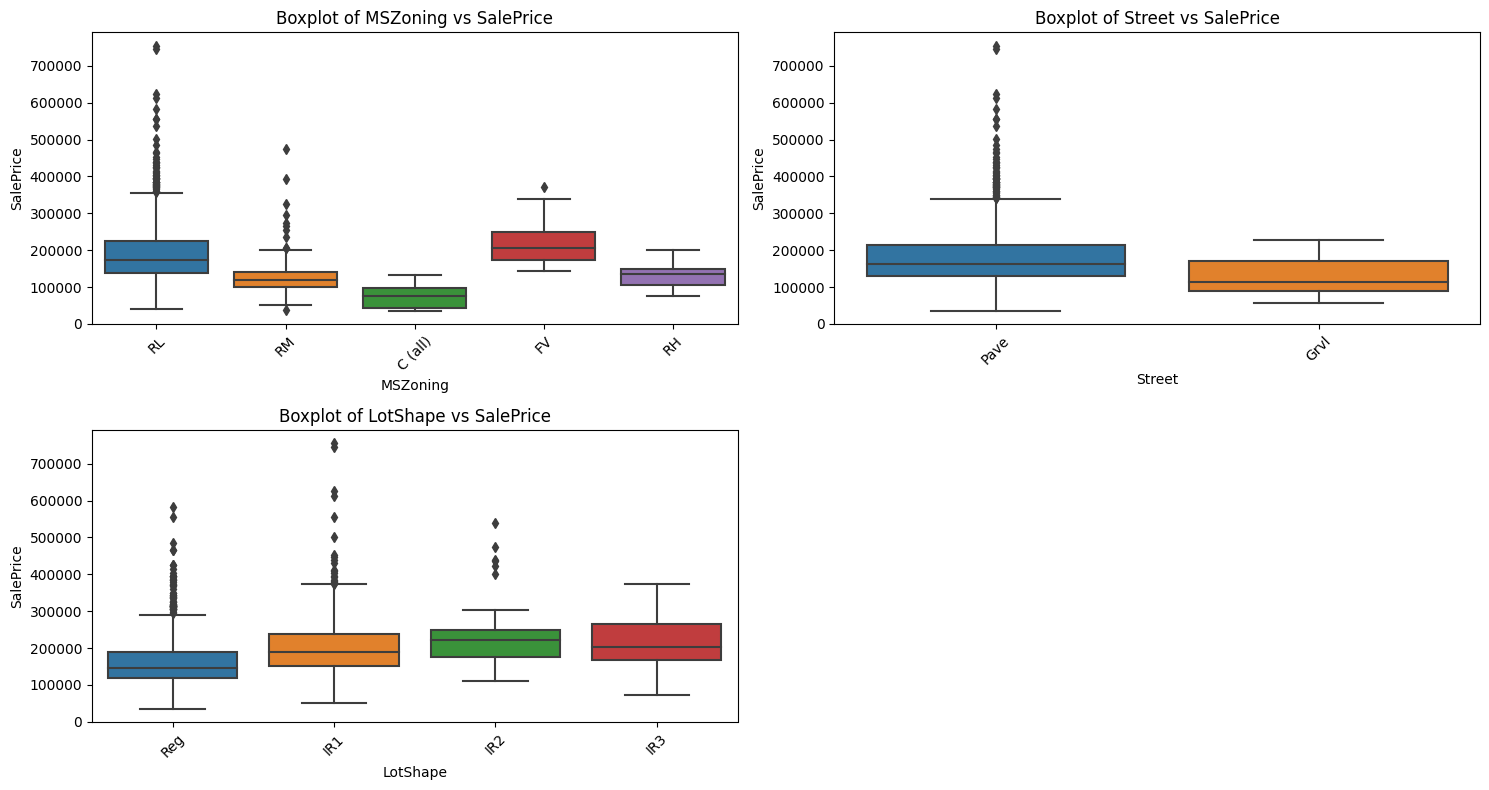

In [49]:
categorical_features = ['MSZoning', 'Street', 'LotShape']

plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=train_data, x=feature, y='SalePrice')
    plt.title(f"Boxplot of {feature} vs SalePrice")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Pre-Processing Data

In [50]:
# Step 1: Dealing with Null Values
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley']
train_data.drop(columns=cols_to_drop, inplace=True)
train_data['LotFrontage'].fillna(train_data['LotFrontage'].median(), inplace=True)
train_data.fillna(method='ffill', inplace=True)

In [51]:
# Step 2: Feature Selection
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])  
correlation_matrix = numeric_data.corr()
top_corr_features = correlation_matrix.index[abs(correlation_matrix["SalePrice"]) > 0.5]

In [52]:
# Step 3: Feature Engineering
train_data['HouseAge'] = train_data['YrSold'] - train_data['YearBuilt']

In [53]:
# Step 4: Data Splitting
X = train_data.drop(columns=['SalePrice'])
y = train_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Modeling

In [54]:
numeric_data = train_data.select_dtypes(include=[np.number])
X = numeric_data.drop(columns=['SalePrice'])
y = numeric_data['SalePrice']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1168, 38), (292, 38))

In [56]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse


1360675490.7172184

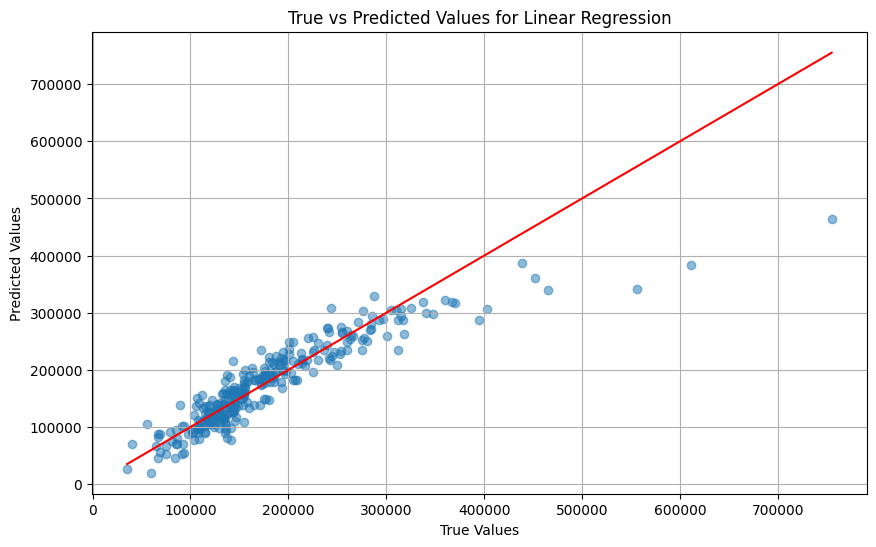

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # y=x line for perfect predictions
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values for Linear Regression')
plt.grid(True)
plt.show()

In [59]:
rmse = np.sqrt(1360675490.7172184)  
rmse

36887.335099153184

Expierment 2

In [60]:
train_data_encoded = pd.get_dummies(train_data)

In [61]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_rf

29561.901653885223

Expierment 3

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

X_train_reduced.shape


(1168, 27)

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train_reduced, y_train)

GradientBoostingRegressor(random_state=42)

In [79]:
X_test_reduced = pca.transform(X_test) 
y_pred_gbr = gbr_model.predict(X_test_reduced)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
rmse_gbr


29934.678743839093